In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point, LineString, Polygon
from dateutil.parser import parse
import requests 
import json
from io import StringIO

# these are all things that might be currently needed 

In [ ]:
#use your own 
headers={'X-App-Token':'BLANK'}
##https://dev.socrata.com/foundry/data.sfgov.org/wr8u-xric go here to create a token 

url='https://data.sfgov.org/api/v3/views/wr8u-xric/query.json?query=SELECT%0A%20%20%60incident_number%60%2C%0A%20%20%60exposure_number%60%2C%0A%20%20%60id%60%2C%0A%20%20%60address%60%2C%0A%20%20%60incident_date%60%2C%0A%20%20%60call_number%60%2C%0A%20%20%60alarm_dttm%60%2C%0A%20%20%60arrival_dttm%60%2C%0A%20%20%60close_dttm%60%2C%0A%20%20%60city%60%2C%0A%20%20%60zipcode%60%2C%0A%20%20%60battalion%60%2C%0A%20%20%60station_area%60%2C%0A%20%20%60box%60%2C%0A%20%20%60suppression_units%60%2C%0A%20%20%60suppression_personnel%60%2C%0A%20%20%60ems_units%60%2C%0A%20%20%60ems_personnel%60%2C%0A%20%20%60other_units%60%2C%0A%20%20%60other_personnel%60%2C%0A%20%20%60first_unit_on_scene%60%2C%0A%20%20%60estimated_property_loss%60%2C%0A%20%20%60estimated_contents_loss%60%2C%0A%20%20%60fire_fatalities%60%2C%0A%20%20%60fire_injuries%60%2C%0A%20%20%60civilian_fatalities%60%2C%0A%20%20%60civilian_injuries%60%2C%0A%20%20%60number_of_alarms%60%2C%0A%20%20%60primary_situation%60%2C%0A%20%20%60mutual_aid%60%2C%0A%20%20%60action_taken_primary%60%2C%0A%20%20%60action_taken_secondary%60%2C%0A%20%20%60action_taken_other%60%2C%0A%20%20%60detector_alerted_occupants%60%2C%0A%20%20%60property_use%60%2C%0A%20%20%60area_of_fire_origin%60%2C%0A%20%20%60ignition_cause%60%2C%0A%20%20%60ignition_factor_primary%60%2C%0A%20%20%60ignition_factor_secondary%60%2C%0A%20%20%60heat_source%60%2C%0A%20%20%60item_first_ignited%60%2C%0A%20%20%60human_factors_associated_with_ignition%60%2C%0A%20%20%60structure_type%60%2C%0A%20%20%60structure_status%60%2C%0A%20%20%60floor_of_fire_origin%60%2C%0A%20%20%60fire_spread%60%2C%0A%20%20%60no_flame_spread%60%2C%0A%20%20%60number_of_floors_with_minimum_damage%60%2C%0A%20%20%60number_of_floors_with_significant_damage%60%2C%0A%20%20%60number_of_floors_with_heavy_damage%60%2C%0A%20%20%60number_of_floors_with_extreme_damage%60%2C%0A%20%20%60detectors_present%60%2C%0A%20%20%60detector_type%60%2C%0A%20%20%60detector_operation%60%2C%0A%20%20%60detector_effectiveness%60%2C%0A%20%20%60detector_failure_reason%60%2C%0A%20%20%60automatic_extinguishing_system_present%60%2C%0A%20%20%60automatic_extinguishing_sytem_type%60%2C%0A%20%20%60automatic_extinguishing_sytem_perfomance%60%2C%0A%20%20%60automatic_extinguishing_sytem_failure_reason%60%2C%0A%20%20%60number_of_sprinkler_heads_operating%60%2C%0A%20%20%60supervisor_district%60%2C%0A%20%20%60neighborhood_district%60%2C%0A%20%20%60point%60%2C%0A%20%20%60data_as_of%60%2C%0A%20%20%60data_loaded_at%60'
r=requests.get(url,headers=headers)
# this needs to be updated to use api 
# r1=requests.get('https://data.sfgov.org/resource/wr8u-xric.geojson')

In [3]:
df_base=pd.read_json(StringIO(json.dumps(r.json())))



In [4]:
df_base['incident_year']=df_base['incident_date'].apply(lambda x:parse(x).year)
df_base['incident_month']=df_base['incident_date'].apply(lambda x:parse(x).month)

In [5]:
# df_base['primary_situation_code']=df_base['primary_situation'].apply(lambda x:x.split(" - ")[0])
# df_base['primary_situation_label']=df_base['primary_situation'].apply(lambda x:x.split(" - ")[1])

In [6]:
base_date=df_base.groupby(['neighborhood_district','primary_situation'],as_index=False)['incident_date'].nunique()
# this is the amount of unique incident_dates for each neighborhood and primary_situation
base_amount=df_base.groupby(['neighborhood_district','primary_situation'],as_index=False)['incident_number'].nunique()
# this is the amount of unique incident_numbers for each neighborhood and primary_situation


In [ ]:
base_date.columns=['neighborhood_district','primary_situation','date_amount']
base_amount.columns=['neighborhood_district','primary_situation','incident_amount']

In [ ]:
base_amount=base_amount.sort_values(by='incident_amount',ascending=False)
base_date=base_date.sort_values(by='date_amount',ascending=False)

In [ ]:
base_amount=base_amount.reset_index(drop=True)
base_date=base_date.reset_index(drop=True)

In [111]:
base_amount[base_amount['primary_situation']=='700 - False alarm or false call, other'].sort_values(by='incident_number',ascending=False)

,neighborhood_district,primary_situation,incident_number
1580,Financial District/South Beach,"700 - False alarm or false call, other",2537
8869,Tenderloin,"700 - False alarm or false call, other",2417
4594,Mission,"700 - False alarm or false call, other",1622
8277,South of Market,"700 - False alarm or false call, other",1287
5115,Nob Hill,"700 - False alarm or false call, other",1058
255,Bayview Hunters Point,"700 - False alarm or false call, other",902
10058,Western Addition,"700 - False alarm or false call, other",884
5616,North Beach,"700 - False alarm or false call, other",798
1020,Chinatown,"700 - False alarm or false call, other",789
6644,Pacific Heights,"700 - False alarm or false call, other",684


In [13]:
base_amount

,neighborhood_district,primary_situation,incident_amount
0,Mission,"711 - Municipal alarm system, Street Box False",7149
1,South of Market,"711 - Municipal alarm system, Street Box False",6759
2,Tenderloin,"711 - Municipal alarm system, Street Box False",6672
3,Financial District/South Beach,"700 False alarm or false call, other",4497
4,Tenderloin,"700 False alarm or false call, other",4133
...,...,...,...
10108,Bayview Hunters Point,133 - Rail vehicle fire,1
10109,Japantown,443 - Light ballast breakdown,1
10110,Bayview Hunters Point,121 - Fire in mob. home used as residence,1
10111,Western Addition,814 - Lightning strike (no fire),1


It looks like False calls might happen alot 
for  the situations with over 1000 incidents 
how many are from one address  in one neighborhood year over year 

In [141]:
base_amount[base_amount['incident_amount']>1000]

,neighborhood_district,primary_situation,incident_amount
0,Mission,"711 - Municipal alarm system, Street Box False",7149
1,South of Market,"711 - Municipal alarm system, Street Box False",6759
2,Tenderloin,"711 - Municipal alarm system, Street Box False",6672
3,Financial District/South Beach,"700 False alarm or false call, other",4497
4,Tenderloin,"700 False alarm or false call, other",4133
...,...,...,...
87,Mission,322 - Vehicle accident with injuries,1016
88,Sunset/Parkside,"440 Electrical wiring/equipment problem, other",1013
89,North Beach,"711 - Municipal alarm system, Street Box False",1011
90,Mission,"311 Medical assist, assist EMS crew",1008


In [14]:
# we will use this to filter the data 
filter_table=base_date[base_date['date_amount']>1000]

In [15]:
filter_table

,neighborhood_district,primary_situation,date_amount
0,Mission,"711 - Municipal alarm system, Street Box False",3050
1,South of Market,"711 - Municipal alarm system, Street Box False",2852
2,Tenderloin,"711 - Municipal alarm system, Street Box False",2842
3,Financial District/South Beach,"700 False alarm or false call, other",2434
4,Tenderloin,"700 False alarm or false call, other",2352
...,...,...,...
57,Tenderloin,733 - Smoke detector activation/malfunction,1016
58,Castro/Upper Market,"711 - Municipal alarm system, Street Box False",1015
59,South of Market,"700 - False alarm or false call, other",1008
60,Hayes Valley,"711 - Municipal alarm system, Street Box False",1007


In [16]:
df_base

,incident_number,exposure_number,id,address,incident_date,call_number,alarm_dttm,arrival_dttm,close_dttm,city,...,detector_operation,detector_failure_reason,detector_effectiveness,ignition_factor_secondary,box,automatic_extinguishing_sytem_type,automatic_extinguishing_sytem_perfomance,automatic_extinguishing_sytem_failure_reason,incident_year,incident_month
0,6001716,0,60017160,333 Taylor St.,2006-01-06T00:00:00.000,60060339,2006-01-06T17:26:58.000,2006-01-06T17:31:15.000,2006-01-06T17:34:21.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,1
1,6001718,0,60017180,1011 Howard St.,2006-01-06T00:00:00.000,60060342,2006-01-06T17:30:09.000,2006-01-06T17:33:36.000,2006-01-06T17:37:51.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,1
2,6001723,0,60017230,Hawes St. / Innes Av.,2006-01-06T00:00:00.000,60060347,2006-01-06T17:42:32.000,2006-01-06T17:47:57.000,2006-01-06T17:53:30.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,1
3,6001724,0,60017240,350 Masonic Av.,2006-01-06T00:00:00.000,60060349,2006-01-06T17:49:22.000,2006-01-06T17:52:35.000,2006-01-06T18:00:37.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,1
4,6001727,0,60017270,Fillmore St. / Mcallister St.,2006-01-06T00:00:00.000,60060352,2006-01-06T17:56:35.000,2006-01-06T17:58:30.000,2006-01-06T18:06:09.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718492,11009169,0,110091690,3562 20th St.,2011-01-28T00:00:00.000,110280123,2011-01-28T10:52:25.000,2011-01-28T10:56:49.000,2011-01-28T11:09:21.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1
718493,11009174,0,110091740,495 Geary St.,2011-01-28T00:00:00.000,110280128,2011-01-28T11:16:23.000,2011-01-28T11:18:54.000,2011-01-28T11:21:26.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1
718494,11009175,0,110091750,129 Hyde St.,2011-01-28T00:00:00.000,110280129,2011-01-28T11:17:13.000,2011-01-28T11:21:00.000,2011-01-28T11:26:46.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1
718495,11009176,0,110091760,300 Seneca Av.,2011-01-28T00:00:00.000,110280130,2011-01-28T11:20:36.000,2011-01-28T11:24:13.000,2011-01-28T11:35:53.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,1


In [17]:
filtered_base=df_base[(df_base['primary_situation'].isin(pd.Series(filter_table['primary_situation'].unique()))) & (df_base['neighborhood_district'].isin(pd.Series(filter_table['neighborhood_district'].unique())))]

In [18]:
new_base=filtered_base[['incident_number','id','incident_date','primary_situation','neighborhood_district','incident_year','incident_month','point']]

In [19]:
# new_base['incident_month']=new_base['incident_date'].apply(lambda x:parse(x).month)

In [147]:
by_year=df_base[(df_base['neighborhood_district']=='Mission') & (df_base['primary_situation']=='711 - Municipal alarm system, Street Box False')].groupby(['address','year'],as_index=False)['incident_number'].nunique()

In [152]:
pre=df_base[(df_base['neighborhood_district']=='Mission') & (df_base['primary_situation']=='711 - Municipal alarm system, Street Box False')]

In [20]:
new_base

,incident_number,id,incident_date,primary_situation,neighborhood_district,incident_year,incident_month,point
1,6001718,60017180,2006-01-06T00:00:00.000,"113 - Cooking fire, confined to container",South of Market,2006,1,"{'type': 'Point', 'coordinates': [-122.407345,..."
9,6001754,60017540,2006-01-06T00:00:00.000,"711 - Municipal alarm system, Street Box False",South of Market,2006,1,"{'type': 'Point', 'coordinates': [-122.407163,..."
21,6001782,60017820,2006-01-06T00:00:00.000,"711 - Municipal alarm system, Street Box False",Bayview Hunters Point,2006,1,"{'type': 'Point', 'coordinates': [-122.392626,..."
25,6001790,60017900,2006-01-06T00:00:00.000,735 - Alarm system sounded due to malfunction,South of Market,2006,1,"{'type': 'Point', 'coordinates': [-122.411561,..."
37,6001843,60018430,2006-01-07T00:00:00.000,733 - Smoke detector activation/malfunction,South of Market,2006,1,"{'type': 'Point', 'coordinates': [-122.410537,..."
...,...,...,...,...,...,...,...,...
718481,11009108,110091080,2011-01-28T00:00:00.000,735 - Alarm system sounded due to malfunction,South of Market,2011,1,"{'type': 'Point', 'coordinates': [-122.41354, ..."
718486,11009152,110091520,2011-01-28T00:00:00.000,733 - Smoke detector activation/malfunction,Western Addition,2011,1,"{'type': 'Point', 'coordinates': [-122.4274609..."
718491,11009165,110091650,2011-01-28T00:00:00.000,"711 - Municipal alarm system, Street Box False",South of Market,2011,1,"{'type': 'Point', 'coordinates': [-122.396533,..."
718493,11009174,110091740,2011-01-28T00:00:00.000,745 - Alarm system sounded/no fire-accidental,Tenderloin,2011,1,"{'type': 'Point', 'coordinates': [-122.411105,..."


In [21]:
amount_table=new_base.groupby(['neighborhood_district','incident_year','incident_month','primary_situation'],as_index=False)['incident_number'].nunique()

In [22]:
amount_table['date_key']=amount_table.apply(lambda x:(str(x['incident_year'])+"-"+str(x['incident_month'])),axis=1)

In [23]:
amount_table.to_csv('test_table_current.csv',index=False)

In [57]:
amount_table[amount_table['neighborhood_district']=='Bayview Hunters Point']

,neighborhood_district,incident_year,incident_month,primary_situation,incident_number,date_key
0,Bayview Hunters Point,2003,1,"113 - Cooking fire, confined to container",1,2003-1
1,Bayview Hunters Point,2003,1,"700 - False alarm or false call, other",5,2003-1
2,Bayview Hunters Point,2003,1,"711 - Municipal alarm system, Street Box False",65,2003-1
3,Bayview Hunters Point,2003,1,735 - Alarm system sounded due to malfunction,6,2003-1
4,Bayview Hunters Point,2003,1,"740 - Unintentional alarm, other",2,2003-1
...,...,...,...,...,...,...
2275,Bayview Hunters Point,2025,9,554 Assist invalid,1,2025-9
2276,Bayview Hunters Point,2025,9,"700 False alarm or false call, other",16,2025-9
2277,Bayview Hunters Point,2025,9,735 Alarm system sounded due to malfunction,1,2025-9
2278,Bayview Hunters Point,2025,9,"743 Smoke detector activation, no fire - unint...",4,2025-9


<Axes: xlabel='incident_year', ylabel='incident_number'>

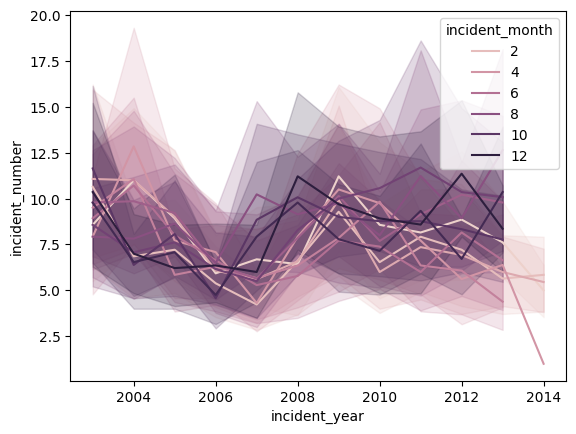

In [25]:
sns.lineplot(data=amount_table[amount_table['primary_situation']=='700 - False alarm or false call, other'],x='incident_year',y='incident_number',hue='incident_month')

In [40]:
amount_table.sort_values(by='incident_number')

,neighborhood_district,incident_year,incident_month,primary_situation,incident_number
4946,Castro/Upper Market,2014,8,"150 Outside rubbish fire, other",1
4947,Castro/Upper Market,2014,8,"151 Outside rubbish, trash or waste fire",1
4950,Castro/Upper Market,2014,8,554 Assist invalid,1
4953,Castro/Upper Market,2014,8,735 Alarm system sounded due to malfunction,1
4957,Castro/Upper Market,2014,9,"150 Outside rubbish fire, other",1
...,...,...,...,...,...
27752,Tenderloin,2010,6,"711 - Municipal alarm system, Street Box False",110
16092,Mission,2011,7,"711 - Municipal alarm system, Street Box False",110
27836,Tenderloin,2011,6,"711 - Municipal alarm system, Street Box False",128
28018,Tenderloin,2013,8,"711 - Municipal alarm system, Street Box False",129


In [156]:
pre[pre['address']=='1 DUBOCE AV']['point'].iloc[0]

{'type': 'Point', 'coordinates': [-122.42008, 37.77003]}

In [160]:
by_year['address'].apply(lambda x:x.lower())

0                     1 duboce av
1                     1 duboce av
2                    1 duboce av.
3                    1 duboce av.
4                    1 duboce av.
                  ...            
1002      valencia st. / 17th st.
1003      valencia st. / 19th st.
1004      valencia st. / 24th st.
1005      valencia st. / 25th st.
1006    van ness av. / market st.
Name: address, Length: 1007, dtype: object

In [149]:
by_year.sort_values(by='incident_number')

,address,year,incident_number
995,Shotwell St. / 21st St.,2009,1
994,Potrero Av. / 23rd St.,2012,1
993,Potrero Av. / 21st St.,2009,1
992,Mission St. / South Van Ness Av.,2003,1
978,Market St. / Octavia St.,2004,1
...,...,...,...
282,16th St. / Mission St.,2012,65
786,26th St. / Mission St.,2006,66
204,15th St. / Mission St.,2012,70
662,24th St. / Folsom St.,2011,91
